In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [20]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.expand_frame_repr', True)

In [2]:
donors = pd.read_csv('data.csv')

/var/folders/n7/3f1mct1521j5vz1r2r1xwby80000gn/T/ipykernel_86510/2046002653.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  donors = pd.read_csv('data.csv')


In [91]:
target = donors[['TARGET_B', 'TARGET_D']]

In [94]:
target.head(40)

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,0,0.0


In [3]:
donors.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0

In [4]:
numerical = pd.read_csv('numerical.csv')

In [5]:
categorical = pd.read_csv('categorical.csv')

In [25]:
numerical.isna().any().any()

False

In [26]:
categorical.isna().any().any()

True

In [27]:
categorical.isna().any()

Unnamed: 0    False
STATE         False
MAILCODE      False
NOEXCH         True
MDMAUD        False
CLUSTER       False
HOMEOWNR      False
GENDER        False
DATASRCE      False
RFA_2R        False
RFA_2A        False
GEOCODE2      False
DOMAIN_A      False
DOMAIN_B      False
dtype: bool

In [28]:
categorical['NOEXCH']

0        0
1        0
2        0
3        0
4        0
        ..
95407    0
95408    0
95409    0
95410    0
95411    0
Name: NOEXCH, Length: 95412, dtype: object

In [ ]:
# I am assuming that we do not really need the NOEXCH column for our models

In [34]:
categorical.drop('NOEXCH', axis=1, inplace=True)

In [35]:
categorical.drop('Unnamed: 0', axis=1, inplace=True)

In [38]:
categorical.isna().any().any()

False

Now, neither categorical nor numerical have NaNs. Going to start the simplification of features before modelling

CATEGORICALS

In [47]:
categorical.columns

Index(['STATE', 'MAILCODE', 'MDMAUD', 'CLUSTER', 'HOMEOWNR', 'GENDER',
       'DATASRCE', 'RFA_2R', 'RFA_2A', 'GEOCODE2', 'DOMAIN_A', 'DOMAIN_B'],
      dtype='object')

In [39]:
categorical['MDMAUD'].value_counts()

XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
C5CM        3
C2MM        3
C2LM        3
D5TM        3
I1LM        3
I5CM        1
C1MM        1
I5MM        1
C5MM        1
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64

In [41]:
def simplify_MDMAUD(x):
    if x != 'XXXX':
        return 1
    else:
        return 0

In [43]:
categorical['MDMAUD'] = categorical['MDMAUD'].apply(simplify_MDMAUD)

In [44]:
categorical['MDMAUD'].value_counts()

0    95118
1      294
Name: MDMAUD, dtype: int64

In [46]:
categorical['GENDER'].value_counts()

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

In [49]:
categorical['STATE'].value_counts()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

In [51]:
def simplify_state(x):
    if x in ['CA', 'FL', 'TX', 'IL']:
        return x
    else:
        return 'other'

In [52]:
categorical['STATE'] = categorical['STATE'].apply(simplify_state)

In [53]:
categorical['STATE'].value_counts()

other    55738
CA       17343
FL        8376
TX        7535
IL        6420
Name: STATE, dtype: int64

In [54]:
categorical.drop('MAILCODE', axis=1, inplace=True)

In [55]:
categorical['CLUSTER'].value_counts()

40    6295
35    3624
36    3617
27    3553
24    3539
49    3315
12    3000
18    2897
13    2706
30    2607
39    2601
45    2515
43    2385
11    2378
51    2322
14    2246
41    2176
44    1953
16    1947
2     1942
21    1891
8     1828
10    1804
46    1800
28    1630
17    1621
20    1568
53    1441
3     1428
34    1358
42    1358
23    1324
31    1285
22    1282
25    1275
38    1200
15    1173
1     1140
7     1076
5     1014
37     972
26     947
47     868
29     859
32     795
48     787
50     776
9      770
6      603
33     593
4      561
19     497
52     270
Name: CLUSTER, dtype: int64

In [56]:
categorical['HOMEOWNR'].value_counts()

H    52354
U    43058
Name: HOMEOWNR, dtype: int64

In [ ]:
# 'GENDER', 'DATASRCE', 'RFA_2R', 'RFA_2A', 'GEOCODE2', 'DOMAIN_A', 'DOMAIN_B'

In [59]:
categorical['RFA_2R'].value_counts()

L    95412
Name: RFA_2R, dtype: int64

In [61]:
# drop this only one value

categorical.drop('RFA_2R', axis=1, inplace=True)

In [71]:
categorical['GEOCODE2'].value_counts()

A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

In [68]:
categorical['DOMAIN_A'].value_counts()

R    22106
S    21924
C    19689
T    19527
U    12166
Name: DOMAIN_A, dtype: int64

In [65]:
categorical['DOMAIN_B'].value_counts()

2    48356
1    28498
3    16754
4     1804
Name: DOMAIN_B, dtype: int64

In [67]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE     95412 non-null  object
 1   MDMAUD    95412 non-null  int64 
 2   CLUSTER   95412 non-null  int64 
 3   HOMEOWNR  95412 non-null  object
 4   GENDER    95412 non-null  object
 5   DATASRCE  95412 non-null  object
 6   RFA_2A    95412 non-null  object
 7   GEOCODE2  95412 non-null  object
 8   DOMAIN_A  95412 non-null  object
 9   DOMAIN_B  95412 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 7.3+ MB


In [70]:
# Domain A in this case it should be a string

categorical['DOMAIN_A'] = categorical['DOMAIN_A'].astype(str)

In [75]:
categorical.shape

(95412, 10)

NUMERICAL

In [72]:
numerical.head()

,Unnamed: 0,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,...,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,8901,0,3712,60.000000,5.0,6.0,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,...,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,7.741935,95515,0,4,39.0
1,1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,...,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,15.666667,148535,0,2,1.0
2,2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,...,3,3,6,7,1,8,74,3,1,120,22,20,28,16,6,5,3,1,23,1,16,6,0,0,0,10,21,0,28,23,32,8,1,14,1,5,0,0,7,0,0,0,0,0,1,0,0,2,84,96,3,0,0,92,65,29,9,22,3,12,23,50,69,31,0,0,0,6,35,44,0,15,22,77,17,97,92,9,2,6,5,26,9702,63,6,14,202.0,27,14,2.0,9111,16.0,9207,5.0,9512,7.481481,15078,1,4,60.0
3,3,8701,0,2801,70.000000,1.0,4.0,2,0,23,14,31,3,0,3,0.0,640,160,219,0,8,92,54,46,61,0,0,11,32,6,2,0,0,0,0,0,31,0,0,1,32,40,44,34,43,47,25,45,35,20,15,25,17,17,12,7,7,20,17,30,14,19,25,11,23,23,27,50,30,15,8,63,9,6,23,199,283,85,83,3,4,1,0,2,0,2,1000,1263,2,1,48,52,93,7,6,36,73,61,30,84,...,3,3,3,0,3,6,87,0,0,120,28,12,14,27,10,3,5,0,19,1,17,0,0,0,0,13,23,0,14,40,31,16,0,1,0,13,0,0,4,0,0,0,3,0,0,0,0,29,67,56,41,3,0,94,43,27,4,38,0,10,19,39,45,55,0,0,45,22,17,0,0,16,23,77,22,93,89,16,2,6,6,27,9702,66,6,14,109.0,16,7,2.0,8711,11.0,9411,10.0,9512,6.812500,172556,1,4,41.0
4,4,8601,0,2001,78.000000,3.0,2.0,60,1,28,9,53,26,3,2,5.0,2520,627,761,99,0,0,46,54,2,98,0,0,1,0,0,0,0,0,0,0,0,0,0,0,33,45,50,36,46,50,27,34,43,23,14,21,13,15,20,12,5,13,15,34,19,19,31,7,27,16,26,57,36,24,14,42,17,9,33,235,323,99,98,0,0,0,0,0,0,0,576,594,4,3,90,10,97,3,0,42,82,49,22,92,...,4,3,26,3,2,7,49,12,1,120,16,20,30,13,3,12,5,2,26,1,20,7,1,1,1,15,28,4,9,16,53,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,99,0,0,0,90,45,18,25,34,0,1,3,6,33,67,0,0,9,14,72,3,0,0,99,1,21,99,96,6,2,7,11,43,9702,113,10,25,254.0,37,8,3.0,9310,15.0,9601,15.0,9601,6.86486

In [74]:
numerical.drop('Unnamed: 0', axis=1, inplace=True)

In [76]:
numerical.shape

(95412, 320)

Numerical presents too many features to be used in a model, I am going to use technics to reduce them

In [77]:
# to look at VarianceThresholds we need all the variable to be on the same scale
# we will use MinMaxScaler for this

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical)

In [78]:
from sklearn.feature_selection import VarianceThreshold 
var_threshold = 0.02
sel = VarianceThreshold(threshold=(var_threshold))

# 1) default is threshold = 0 :eliminate all coumns that are identical for all rows
# 2) in practice we would scale the columns first, and then apply threshold, or apply 
#    a different threshold for different columns

# This drops the columns that have a variance less than this threshold
sel = sel.fit(numerical_scaled)
temp = sel.transform(numerical_scaled)
temp = pd.DataFrame(temp)
print(numerical_scaled.shape)
print(temp.shape)

(95412, 320)
(95412, 82)


In [79]:
temp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
0,0.426523,0.382286,0.608247,0.666667,0.666667,0.343434,0.181818,0.555556,0.0,0.353535,0.656566,0.929293,0.010101,0.494949,0.979798,0.959596,0.020202,0.000000,0.000000,0.079833,0.105833,0.230769,0.153846,0.868687,0.141414,0.070707,0.808081,0.707071,0.848485,0.505051,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.616162,0.000000,0.000000,0.000000,0.020202,0.050505,0.171717,0.737374,0.000000,0.271889,0.131313,0.515152,0.464646,0.545455,0.131313,0.454545,0.646465,0.646465,0.626263,0.535354,1.000000,0.0,0.343434,0.181818,0.747475,0.888889,0.777778,0.596154,0.141414,0.141414,0.313131,0.545455,0.464646,0.909091,0.101010,0.333333,0.656566,0.404040,0.285714,0.4,0.433333,0.045226,0.498045,0.0,1.000000,0.622951
1,0.784946,0.535736,0.463918,0.833333,1.000000,0.555556,0.111111,1.000000,1.0,0.000000,0.000000,0.676768,0.000000,0.757576,1.000000,1.000000,0.000000,0.000000,0.000000,0.911333,0.869667,0.923077,0.769231,0.969697,0.040404,0.090909,0.949495,0.888889,0.959596,0.444444,0.979798,0.989899,0.989899,0.989899,1.000000,0.949495,0.838384,0.000000,0.000000,0.000000,0.919192,0.919192,0.919192,0.949495,0.478632,0.019969,0.020202,0.666667,0.565657,0.444444,0.020202,0.717172,0.838384,0.818182,0.646465,0.575758,1.000000,1.0,0.555556,0.111111,0.393939,0.505051,0.929293,0.192308,0.262626,0.565657,0.979798,1.000000,0.000000,0.969697,0.040404,1.000000,0.000000,1.000000,0.952381,0.8,0.183333,0.045226,0.774510,0.0,0.333333,0.000000
2,0.498208,0.000000,0.624862,0.333333,0.111111,0.292929,0.333333,0.111111,0.0,0.020202,0.989899,0.969697,0.020202,0.444444,0.696970,0.696970,0.060606,0.050505,0.030303,0.082833,0.091000,0.153846,0.076923,0.787879,0.222222,0.181818,0.767677,0.656566,0.868687,0.606061,0.000000,0.010101,0.060606,0.181818,0.505051,0.000000,0.363636,0.020202,0.242424,0.030303,0.000000,0.020202,0.090909,0.444444,0.000000,0.431644,0.323232,0.313131,0.383838,0.626263,0.212121,0.616162,0.737374,0.707071,0.787879,0.626263,0.828283,1.0,0.282828,0.323232,0.848485,0.969697,0.656566,0.423077,0.121212,0.232323,0.505051,0.696970,0.313131,0.000000,0.353535,0.222222,0.777778,0.171717,0.428571,0.4,0.416667,0.045226,0.078617,1.0,1.000000,0.967213
3,0.283154,0.288465,0.711340,0.000000,0.444444,0.141414,0.313131,0.000000,0.0,0.080808,0.929293,0.616162,0.000000,0.505051,0.858586,0.838384,0.040404,0.010101,0.000000,0.166667,0.210500,0.153846,0.076923,0.484848,0.525253,0.060606,0.737374,0.616162,0.848485,0.363636,0.101010,0.252525,0.505051,0.696970,0.929293,0.101010,0.424242,0.000000,0.090909,0.000000,0.010101,0.080808,0.171717,0.343434,0.997863,0.102919,0.272727,0.262626,0.464646,0.545455,0.171717,0.434343,0.818182,0.686869,0.333333,0.313131,0.000000,1.0,0.141414,0.313131,0.676768,0.565657,0.434343,0.730769,0.101010,0.191919,0.393939,0.454545,0.555556,0.454545,0.171717,0.232323,0.777778,0.222222,0.761905,0.4,0.433333,0.045226,0.899764,1.0,1.000000,0.655738
4,0.211470,0.206076,0.793814,0.333333,0.222222,0.090909,0.535354,0.555556,1.0,0.000000,0.000000,0.020202,0.989899,0.575758,1.000000,0.989899,0.000000,0.000000,0.000000,0.096000,0.099000,0.307692,0.230769,0.909091,0.101010,0.000000,0.828283,0.494949,0.929293,0.010101,0.000000,0.010101,0.020202,0.161616,0.676768,0.000000,0.454545,0.000000,0.000000,0.000000,0.252525,0.585859,0.747475,0.838384,0.534188,0.195084,0.242424,0.111111,0.202020,0.808081,0.010101,0.767677,0.737374,0.656566,0.808081,0.313131,0.818182,1.0,0.090909,0.535354,0.656566,1.000000,0.454545,0.653846,0.010101,0.030303,0.060606,0.333333,0.676768,0.090909,0.727273,1.000000,0.010101,0.212121,0.285714,0.4,0.700000,0.492462,0.037079,1.0,0.333333,0.409836


In [81]:
sel.variances_ > var_threshold
sel.get_support()
var_list = list(sel.get_support())
var_list

[True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,


In [82]:
list(zip(numerical.columns, var_list))

[('ODATEDW', True),
 ('TCODE', False),
 ('DOB', True),
 ('AGE', True),
 ('INCOME', True),
 ('WEALTH1', True),
 ('HIT', False),
 ('MALEMILI', False),
 ('MALEVET', False),
 ('VIETVETS', True),
 ('WWIIVETS', True),
 ('LOCALGOV', False),
 ('STATEGOV', False),
 ('FEDGOV', False),
 ('WEALTH2', True),
 ('POP901', False),
 ('POP902', False),
 ('POP903', False),
 ('POP90C1', True),
 ('POP90C2', True),
 ('POP90C3', True),
 ('POP90C4', False),
 ('POP90C5', False),
 ('ETH1', True),
 ('ETH2', True),
 ('ETH3', False),
 ('ETH4', False),
 ('ETH5', False),
 ('ETH6', False),
 ('ETH7', False),
 ('ETH8', False),
 ('ETH9', False),
 ('ETH10', False),
 ('ETH11', False),
 ('ETH12', False),
 ('ETH13', False),
 ('ETH14', False),
 ('ETH15', False),
 ('ETH16', False),
 ('AGE901', False),
 ('AGE902', False),
 ('AGE903', False),
 ('AGE904', False),
 ('AGE905', False),
 ('AGE906', False),
 ('AGE907', False),
 ('CHIL1', False),
 ('CHIL2', False),
 ('CHIL3', False),
 ('AGEC1', False),
 ('AGEC2', False),
 ('AGEC3', Fal

In [84]:
cols_to_remove = [col[0] for col in zip(numerical.columns, var_list) if col[1] == False]

In [85]:
cols_to_remove

['TCODE',
 'HIT',
 'MALEMILI',
 'MALEVET',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'POP901',
 'POP902',
 'POP903',
 'POP90C4',
 'POP90C5',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'AGE901',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGE907',
 'CHIL1',
 'CHIL2',
 'CHIL3',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'CHILC1',
 'CHILC2',
 'CHILC3',
 'CHILC4',
 'CHILC5',
 'HHAGE1',
 'HHAGE2',
 'HHAGE3',
 'HHN1',
 'HHN2',
 'HHN4',
 'HHN5',
 'HHN6',
 'MARR1',
 'MARR2',
 'MARR3',
 'MARR4',
 'HHP1',
 'HHP2',
 'DW3',
 'DW7',
 'DW8',
 'DW9',
 'HU3',
 'HU4',
 'HHD1',
 'HHD4',
 'HHD6',
 'HHD7',
 'HHD8',
 'HHD9',
 'HHD10',
 'HHD11',
 'HHD12',
 'ETHC1',
 'ETHC3',
 'ETHC4',
 'ETHC5',
 'ETHC6',
 'HUR1',
 'RHP1',
 'RHP2',
 'RHP3',
 'RHP4',
 'HUPA1',
 'HUPA4',
 'HUPA5',
 'HUPA7',
 'DMA',
 'IC1',
 'IC2',
 'IC3',
 'IC4',
 'IC5',
 'IC7',
 'IC8',
 'IC9',
 'IC10',
 'IC11',
 'IC1

In [86]:
numerical.drop(cols_to_remove, axis=1, inplace=True)

In [87]:
numerical.shape

(95412, 82)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 82 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ODATEDW   95412 non-null  int64  
 1   DOB       95412 non-null  int64  
 2   AGE       95412 non-null  float64
 3   INCOME    95412 non-null  float64
 4   WEALTH1   95412 non-null  float64
 5   VIETVETS  95412 non-null  int64  
 6   WWIIVETS  95412 non-null  int64  
 7   WEALTH2   95412 non-null  float64
 8   POP90C1   95412 non-null  int64  
 9   POP90C2   95412 non-null  int64  
 10  POP90C3   95412 non-null  int64  
 11  ETH1      95412 non-null  int64  
 12  ETH2      95412 non-null  int64  
 13  HHN3      95412 non-null  int64  
 14  DW1       95412 non-null  int64  
 15  DW2       95412 non-null  int64  
 16  DW4       95412 non-null  int64  
 17  DW5       95412 non-null  int64  
 18  DW6       95412 non-null  int64  
 19  HV1       95412 non-null  int64  
 20  HV2       95412 non-null  in

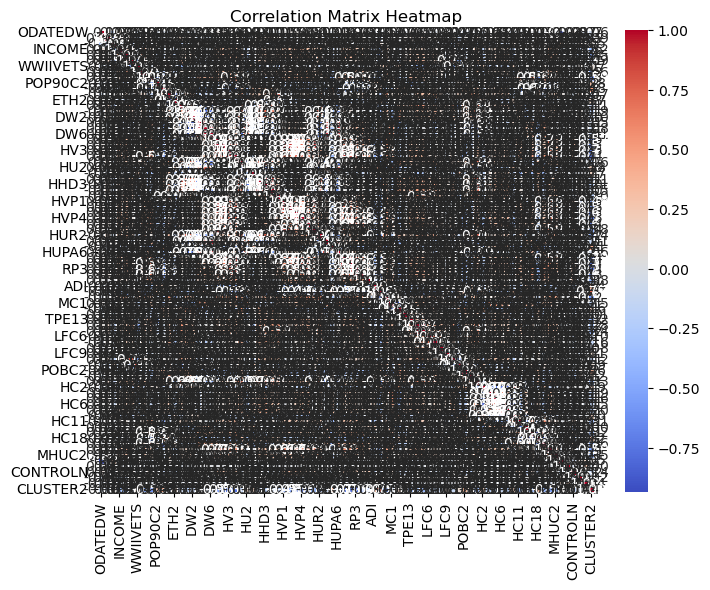

In [90]:
correlation_matrix = numerical.corr()

plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [97]:
correlation_matrix

,ODATEDW,DOB,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HV3,HV4,HU1,HU2,HU5,HHD2,HHD3,HHD5,ETHC2,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,LASTDATE,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
ODATEDW,1.000000,0.099450,-0.265999,0.085431,0.053666,0.048536,-0.064767,0.039534,0.053899,-0.042748,-0.034341,-0.064492,0.031965,0.047123,-0.028494,-0.037091,0.028330,0.031778,0.031521,0.054279,0.055488,0.058391,0.058788,-0.038105,0.032823,-0.034445,0.004579,-0.010971,-0.007524,-0.005772,0.046495,0.052141,0.057488,0.060673,0.053695,0.041772,-0.007448,0.028263,-0.007128,0.033388,0.062116,0.065377,0.062973,0.046457,0.029580,-0.031962,-0.048967,-0.028873,0.056018,-0.065296,0.000250,0.063424,0.051095,0.048049,-0.017116,-0.025099,0.005485,0.011820,0.039505,-0.071519,-0.053617,-0.059419,0.006976,-0.055513,0.046687,0.053642,0.044020,0.039517,-0.049745,-0.000556,0.024756,0.020600,-0.026888,0.011368,0.037661,0.005230,-0.919799,0.026900,0.079036,-0.073435,-0.065082,-0.060138
DOB,0.099450,1.000000,-0.679248,0.094505,0.051860,0.127696,-0.089894,0.086698,0.052511,-0.039035,-0.024650,0.000296,0.020979,0.154828,0.104139,0.099105,-0.068012,-0.067975,-0.065224,0.002893,0.000713,0.049428,0.043088,0.085398,-0.075368,-0.061672,0.123482,0.103997,0.113021,0.070658,-0.014501,-0.006726,0.012372,0.036091,0.067347,-0.019116,0.118782,-0.065960,-0.044480,-0.058076,0.041765,0.057192,0.072341,0.078556,0.016266,-0.027292,-0.110760,0.019231,0.006348,0.011759,0.050362,0.097944,0.129649,0.125954,0.044846,0.055580,0.034344,0.006733,0.105235,-0.107609,0.046698,0.015035,0.123011,-0.043359,0.052837,0.051918,0.051387,0.055458,-0.042432,0.044265,-0.012126,0.004161,0.010401,0.005904,0.033306,0.049687,-0.076432,-0.040782,-0.023648,0.076916,-0.048517,-0.089807
AGE,-0.265999,-0.679248,1.000000,-0.201615,-0.088439,-0.141473,0.170749,-0.064974,0.004867,0.045546,-0.038473,0.033107,-0.017409,-0.182205,-0.057396,-0.055011,0.062355,0.058259,0.055825,-0.001261,0.000205,-0.021831,-0.013559,-0.037648,0.044622,0.066367,-0.110575,-0.093070,-0.085874,-0.078746,0.005241,-0.002583,-0.016691,-0.030147,-0.040022,0.014239,-0.075637,0.059330,0.001337,0.038871,-0.029461,-0.031150,-0.025848,-0.014318,0.010742,0.015344,0.094856,0.056808,-0.034108,0.041811,-0.066628,-0.092761,-0.142710,-0.138768,-0.021991,-0.041526,-0.028837,-0.049591,-0.130107,0.176587,-0.041315,0.025632,-0.125756,0.093883,-0.095288,-0.101471,-0.095578,-0.083365,0.088528,0.008450,0.007749,0.047340,-0.045321,0.059988,-0.039789,-0.018583,0.243972,0.046000,-0.024782,0.083355,0.050085,0.049101
INCOME,0.085431,0.094505,-0.201615,1.000000,0.379435,0.074288,-0.071513,0.253827,0.102759,-0.070627,-0.070915,0.035345,-0.074749,0.096473,0.107091,0.079336,-0.053429,-0.032082,-0.017910,0.277442,0.286873,0.284346,0.271216,0.115385,-0.128318,-0.025131,0.103730,0.161850,0.061232,0.114670,0.253075,0.278750,0.309386,0.314356,0.269224,0.209005,0.233248,-0.010919,-0.105500,-0.033485,0.282156,0.265424,0.226322,0.162136,0.093015,-0.106700,-0.306707,0.221148,0.052975,-0.063866,0.052940,0.103089,0.128588,0.156130,0.017054,0.074700,0.028298,-0.023078,0.072033,-0.066916,-0.121666,-0.036823,0.213324,-0.145778,0.134404,0.134668,0.138009,0.150087,-0.157756,0.049410,0.015335,0.039130,-0.044841,0.029110,0.277794,0.171912,-0.077182,-0.019215,0.077731,-0.119038,-0.064272,-0.316433
WEALTH1,0.053666,0.051860,-0.088439,0.379435,1.000000,0.101133,-0.081012,0.467352,0.163141,-0.133677,-0.091259,0.147052,-0.149873,0.099681,0.175697,0.143312,-0.083242,-0.048912,-0.022805,0.279988,0.291505,0.329324,0.314985,0.210310,-0.223893,-0.045308,0.137438,0.253365,0.092375,0.233173,0.228144,0.254615,0.317497,0.372749,0.375292,0.195566,0.369451,-0.009623,-0.168916,-0.051988,0.328944,0.332632,0.302468,0.221548,0.095228,-0.064919,-0.461959,0.37917

In [107]:
columns_to_drop = []
n_features = len(numerical.columns)

for i in range(n_features):
    for j in range(i + 1, n_features):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            column_i = numerical.columns[i]
            column_j = numerical.columns[j]

            if column_i not in columns_to_drop:
                columns_to_drop.append(column_j)

In [108]:
columns_to_drop

['CARDPROM',
 'DW2',
 'DW5',
 'DW6',
 'HUPA2',
 'HUPA6',
 'HV2',
 'HVP1',
 'HVP2',
 'HVP6',
 'HV4',
 'RP1',
 'HU2',
 'HHD3',
 'HHD5',
 'HVP4',
 'RP3',
 'LFC4',
 'HC8',
 'HC5',
 'HC7',
 'HC18']

In [109]:
numerical.drop(columns_to_drop, axis=1, inplace=True)

In [110]:
numerical.shape

(95412, 60)

In [111]:
categorical.shape

(95412, 10)

In [112]:
target.shape

(95412, 2)

In [116]:
numerical['AGE'] = numerical['AGE'].astype(int)

In [118]:
numerical['INCOME'] = numerical['INCOME'].astype(int)

In [119]:
numerical['WEALTH1'] = numerical['WEALTH1'].astype(int)

In [120]:
numerical['WEALTH2'] = numerical['WEALTH2'].astype(int)

In [134]:
# ODATEDW is not relevat
numerical.drop('ODATEDW', axis=1, inplace=True)

In [135]:
# DOB is not relevat - AGE is there
numerical.drop('DOB', axis=1, inplace=True)

In [136]:
# LASTDATE is not relevat
numerical.drop('LASTDATE', axis=1, inplace=True)

In [137]:
combined_df = pd.concat([numerical, categorical, target], axis=1)

In [138]:
combined_df.head()

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW4,HV1,HV3,HU1,HU5,HHD2,ETHC2,HVP3,HVP5,HUR2,HUPA3,RP2,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC6,HC11,HC13,HC17,HC19,MHUC1,MHUC2,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,MDMAUD,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,TARGET_B,TARGET_D
0,60,5,6,34,18,5,0,35,65,92,1,49,97,2,479,3,86,7,80,50,13,47,61,0,5,73,0.0,177.0,13,51,46,54,13,45,64,62,53,99,0,34,18,74,88,77,31,14,31,90,10,33,40,6,2,95515,0,4,39.0,IL,0,36,U,F,Unknow,E,C,T,2,0,0.0
1,46,6,9,55,11,9,99,0,0,67,0,75,99,0,5468,12,96,9,94,44,98,99,83,0,91,94,4480.0,13.0,2,66,56,44,2,71,83,64,57,99,99,55,11,39,50,92,10,26,97,96,4,99,99,20,4,148535,0,2,1.0,CA,0,14,H,M,3,G,A,S,1,0,0.0
2,61,3,1,29,33,1,0,2,98,96,2,44,69,6,497,2,78,18,76,60,6,50,36,24,2,44,0.0,281.0,32,31,38,62,21,61,73,78,62,82,99,28,32,84,96,65,22,12,50,0,35,22,17,9,2,15078,1,4,60.0,other,0,43,U,M,3,E,C,R,2,0,0.0
3,70,1,4,14,31,0,0,8,92,61,0,50,85,4,1000,2,48,6,73,36,50,92,42,9,8,34,9340.0,67.0,27,26,46,54,17,43,81,33,31,0,99,14,31,67,56,43,38,10,39,45,17,23,22,16,2,172556,1,4,41.0,CA,0,44,U,F,3,E,C,R,2,0,0.0
4,78,3,2,9,53,5,99,0,0,2,98,57,99,0,576,4,90,0,82,1,2,67,45,0,58,83,5000.0,127.0,24,11,20,80,1,76,73,80,31,81,99,9,53,65,99,45,34,1,6,9,72,99,21,6,2,7112,1,2,26.0,FL,0,16,H,F,3,F,A,S,2,0,0.0


In [139]:
X = combined_df.drop(['TARGET_B', 'TARGET_D'], axis=1)
y = combined_df['TARGET_B']

In [165]:
X.shape

(95412, 67)

In [140]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 67 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AGE       95412 non-null  int64  
 1   INCOME    95412 non-null  int64  
 2   WEALTH1   95412 non-null  int64  
 3   VIETVETS  95412 non-null  int64  
 4   WWIIVETS  95412 non-null  int64  
 5   WEALTH2   95412 non-null  int64  
 6   POP90C1   95412 non-null  int64  
 7   POP90C2   95412 non-null  int64  
 8   POP90C3   95412 non-null  int64  
 9   ETH1      95412 non-null  int64  
 10  ETH2      95412 non-null  int64  
 11  HHN3      95412 non-null  int64  
 12  DW1       95412 non-null  int64  
 13  DW4       95412 non-null  int64  
 14  HV1       95412 non-null  int64  
 15  HV3       95412 non-null  int64  
 16  HU1       95412 non-null  int64  
 17  HU5       95412 non-null  int64  
 18  HHD2      95412 non-null  int64  
 19  ETHC2     95412 non-null  int64  
 20  HVP3      95412 non-null  in

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [142]:
X_train.shape

(76329, 67)

In [143]:
X_test.shape

(19083, 67)

In [144]:
y_train.shape

(76329,)

In [145]:
y_test.shape

(19083,)

In [146]:
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include=[np.object])

X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include=[np.object])

/var/folders/n7/3f1mct1521j5vz1r2r1xwby80000gn/T/ipykernel_86510/132797002.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_cat = X_train.select_dtypes(include=[np.object])
/var/folders/n7/3f1mct1521j5vz1r2r1xwby80000gn/T/ipykernel_86510/132797002.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_cat = X_test.select_dtypes(include=[np.object])


In [147]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num)  
X_train_norm = transformer.transform(X_train_num)  
X_train_num_norm = pd.DataFrame(X_train_norm, columns=X_train_num.columns)

In [148]:
X_train_num_norm

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW4,HV1,HV3,HU1,HU5,HHD2,ETHC2,HVP3,HVP5,HUR2,HUPA3,RP2,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC6,HC11,HC13,HC17,HC19,MHUC1,MHUC2,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,MDMAUD,CLUSTER,DOMAIN_B
0,0.618557,0.666667,0.666667,0.050505,0.747475,0.555556,0.636364,0.000000,0.373737,1.000000,0.000000,0.080808,0.131313,0.343434,0.152167,0.692308,0.757576,0.878788,0.616162,0.292929,0.424242,0.898990,0.121212,0.525253,0.606061,0.696970,0.571047,0.204301,0.191919,0.575758,0.727273,0.282828,0.212121,0.686869,0.333333,0.737374,0.626263,1.000000,0.000000,0.050505,0.747475,0.060606,0.949495,0.333333,0.153846,0.373737,0.888889,0.010101,0.929293,0.979798,0.818182,0.428571,0.4,0.226246,1.0,0.333333,0.196721,0.0,0.538462,0.333333
1,0.309278,0.500000,0.666667,0.343434,0.303030,0.555556,1.000000,0.000000,0.000000,0.686869,0.070707,0.525253,1.000000,0.000000,0.121500,0.384615,0.898990,0.131313,0.838384,0.454545,0.050505,0.959596,0.535354,0.000000,0.757576,0.939394,0.910256,0.425499,0.161616,0.282828,0.696970,0.313131,0.000000,0.878788,0.747475,0.737374,0.585859,1.000000,0.000000,0.343434,0.303030,0.282828,0.777778,0.777778,0.096154,0.616162,0.979798,0.727273,0.282828,1.000000,1.000000,0.333333,0.4,0.722413,0.0,0.000000,0.393443,0.0,0.326923,0.333333
2,0.484536,0.166667,0.222222,0.191919,0.333333,0.555556,1.000000,0.000000,0.000000,0.717172,0.000000,0.686869,0.898990,0.050505,0.061333,0.153846,0.535354,0.000000,0.848485,0.373737,0.020202,0.242424,0.242424,0.050505,0.020202,0.404040,0.435897,0.419355,0.555556,0.090909,0.414141,0.595960,0.000000,0.525253,0.616162,0.585859,0.333333,0.868687,0.000000,0.191919,0.333333,0.626263,0.020202,0.222222,0.769231,0.000000,0.252525,0.767677,0.242424,1.000000,1.000000,0.238095,0.4,0.650424,1.0,0.000000,0.803279,0.0,0.173077,1.000000
3,0.556701,0.500000,0.888889,0.202020,0.151515,0.555556,1.000000,0.000000,0.000000,0.828283,0.181818,0.515152,0.979798,0.020202,0.073000,0.230769,0.727273,0.050505,0.818182,0.515152,0.000000,0.272727,0.444444,0.000000,0.141414,0.919192,0.525641,0.274962,0.161616,0.353535,0.545455,0.464646,0.040404,0.585859,0.848485,0.808081,0.646465,1.000000,0.636364,0.202020,0.151515,0.555556,0.989899,0.757576,0.557692,0.060606,0.181818,0.949495,0.060606,1.000000,1.000000,0.238095,0.4,0.582731,1.0,0.000000,0.606557,0.0,0.730769,0.333333
4,0.618557,0.666667,0.666667,0.262626,0.343434,0.555556,1.000000,0.000000,0.000000,0.939394,0.010101,0.151515,0.353535,0.626263,0.787500,0.615385,0.292929,0.363636,0.323232,0.696970,1.000000,1.000000,0.141414,0.000000,0.939394,0.979798,0.635150,0.019969,0.222222,0.494949,0.595960,0.414141,0.060606,0.626263,0.797980,0.686869,0.565657,1.000000,1.000000,0.242424,0.202020,0.393939,0.888889,0.434343,0.750000,0.030303,0.212121,0.797980,0.161616,1.000000,1.000000,0.333333,0.4,0.819213,0.0,0.000000,0.278689,0.0,0.192308,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76324,0.391753,0.833333,0.666667,0.323232,0.303030,0.888889,0.000000,0.050505,0.959596,1.000000,0.000000,0.565657,0.818182,0.040404,0.109667,0.153846,0.878788,0.171717,0.838384,0.606061,0.131313,0.727273,0.656566,0.151515,0.030303,0.525253,0.294872,0.139785,0.131313,0.515152,0.313131,0.696970,0.313131,0.585859,0.848485,0.787879,0.696970,1.000000,1.000000,0.323232,0.303030,0.858586,0.949495,0.828283,0.480769,0.060606,0.424242,0.272727,0.343434,0.121212,0.121212,0.476190,0.6,0.323562,1.0,0.666667,0.704918,0.0,0.826923,0.333333
76325,0.649485,0.333333,0.000000,0.444444,0.565657,0.000000,1.000000,0.000000,0.000000,0.676768,0.131313,0.373737,0.474747,0.515152,0.044833,0.153846,0.313131,0.000000,0.535354,0.454545,0.000000,0.060606,0.272727,0.000000,0.070707,0.595960,0.824786,0.60

In [149]:
X_test_norm = transformer.transform(X_test_num) 
X_test_num_norm = pd.DataFrame(X_test_norm, columns=X_test_num.columns)

In [150]:
X_test_num_norm

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW4,HV1,HV3,HU1,HU5,HHD2,ETHC2,HVP3,HVP5,HUR2,HUPA3,RP2,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC6,HC11,HC13,HC17,HC19,MHUC1,MHUC2,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,MDMAUD,CLUSTER,DOMAIN_B
0,0.628866,0.333333,0.444444,0.191919,0.535354,0.555556,0.0,0.919192,0.090909,0.919192,0.080808,0.404040,0.838384,0.060606,0.079833,0.153846,0.757576,0.020202,0.737374,0.464646,0.030303,0.464646,0.414141,0.101010,0.010101,0.343434,0.000000,0.376344,0.424242,0.313131,0.555556,0.454545,0.151515,0.313131,0.545455,0.525253,0.292929,0.616162,0.000000,0.191919,0.535354,0.787879,1.000000,0.525253,0.423077,0.141414,0.474747,0.585859,0.373737,0.909091,0.777778,0.238095,0.4,0.567380,1.0,0.666667,0.950820,0.0,0.846154,0.333333
1,0.484536,0.333333,0.555556,0.292929,0.444444,0.555556,0.0,0.969697,0.040404,0.929293,0.000000,0.414141,0.808081,0.181818,0.379333,0.538462,0.585859,0.131313,0.696970,0.515152,0.979798,1.000000,0.393939,0.010101,0.898990,0.949495,0.933226,0.019969,0.151515,0.434343,0.515152,0.494949,0.101010,0.454545,0.737374,0.787879,0.616162,0.767677,0.818182,0.292929,0.444444,0.484848,0.898990,0.636364,0.653846,0.020202,0.232323,0.868687,0.111111,1.000000,0.959596,0.523810,0.4,0.828447,1.0,0.000000,0.590164,0.0,0.750000,0.333333
2,0.618557,0.666667,0.666667,0.323232,0.121212,0.555556,0.0,0.000000,1.000000,1.000000,0.010101,0.525253,0.343434,0.000000,0.097167,0.230769,0.808081,0.020202,0.777778,0.666667,0.090909,0.656566,0.292929,0.646465,0.060606,0.828283,0.188034,0.554531,0.212121,0.222222,0.525253,0.484848,0.505051,0.848485,0.838384,0.646465,0.393939,0.808081,0.777778,0.323232,0.121212,0.656566,1.000000,0.585859,0.211538,0.424242,0.848485,0.101010,0.646465,0.707071,0.171717,0.285714,0.6,0.002159,1.0,0.333333,0.606557,0.0,0.807692,0.333333
3,0.618557,0.666667,0.333333,0.424242,0.191919,0.444444,0.0,0.000000,1.000000,0.838384,0.171717,0.555556,0.707071,0.010101,0.099667,0.153846,0.838384,0.080808,0.838384,0.525253,0.151515,0.656566,0.545455,0.282828,0.070707,0.494949,0.000000,0.302611,0.292929,0.282828,0.555556,0.454545,0.393939,0.646465,0.828283,0.717172,0.575758,0.505051,1.000000,0.424242,0.191919,0.777778,1.000000,0.676768,0.288462,0.272727,0.666667,0.141414,0.333333,0.171717,0.141414,0.285714,0.4,0.153026,1.0,0.666667,0.704918,0.0,0.923077,0.333333
4,0.855670,0.666667,0.888889,0.090909,0.383838,0.555556,1.0,0.000000,0.000000,0.848485,0.141414,0.515152,1.000000,0.000000,0.111167,0.461538,0.979798,0.202020,0.898990,0.535354,0.010101,0.989899,0.626263,0.000000,0.717172,0.868687,0.542735,0.170507,0.030303,0.585859,0.303030,0.707071,0.151515,0.626263,0.727273,0.767677,0.606061,1.000000,1.000000,0.090909,0.383838,0.808081,0.989899,0.818182,0.653846,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.380952,0.6,0.410907,1.0,0.000000,0.295082,0.0,0.326923,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.762887,0.833333,1.000000,0.131313,0.525253,1.000000,1.0,0.000000,0.000000,0.979798,0.010101,0.424242,0.989899,0.010101,0.967833,0.923077,0.919192,0.080808,0.767677,0.535354,1.000000,1.000000,0.848485,0.000000,0.969697,0.969697,0.786325,0.099846,0.020202,0.868687,0.272727,0.737374,0.565657,0.555556,0.707071,0.545455,0.434343,0.000000,0.000000,0.131313,0.525253,0.464646,0.868687,0.808081,0.750000,0.000000,0.040404,0.909091,0.090909,1.000000,1.000000,0.952381,0.6,0.846270,1.0,0.000000,0.000000,0.0,0.230769,0.000000
19079,0.618557,0.666667,0.666667,0.484848,0.111111,0.666667,0.0,0.000000,1.000000,1.000000,0.010101,0.474747,0.686869,0.010101,0.108500,0.230769,0.848485,0.000000,0.818182,0.696970,0.070707,0.737374,0.333333,0.303030,0.101010,0.828283,0.333333,0.431644,0.232323,0.363636,0.363636,0.6

In [152]:
X_train_cat

,STATE,HOMEOWNR,GENDER,DATASRCE,RFA_2A,GEOCODE2,DOMAIN_A
36444,FL,U,M,Unknow,G,C,C
16936,other,H,M,2,E,B,S
77914,TX,U,M,3,F,C,U
47503,other,H,F,3,F,B,T
26137,CA,U,M,Unknow,F,A,S
...,...,...,...,...,...,...,...
94853,other,H,F,3,F,D,R
76902,other,U,F,3,F,C,C
72391,FL,H,F,2,G,A,S
78465,CA,U,F,Unknow,D,A,S


In [154]:
# I am going to HotEncode all columns

encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names_out(X_train_cat.columns)
X_train_encoded = pd.DataFrame(encoder.transform(X_train_cat).toarray(), columns=cols)

In [156]:
X_train_encoded.shape

(76329, 20)

In [157]:
cols = encoder.get_feature_names_out(X_train_cat.columns)
X_test_encoded = pd.DataFrame(encoder.transform(X_test_cat).toarray(), columns=cols)

In [158]:
X_test_encoded

,STATE_FL,STATE_IL,STATE_TX,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,DATASRCE_Unknow,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19079,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19080,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19081,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [159]:
X_train_normalized = pd.concat([X_train_num_norm, X_train_encoded], axis=1)

In [160]:
X_train_normalized.head()

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW4,HV1,HV3,HU1,HU5,HHD2,ETHC2,HVP3,HVP5,HUR2,HUPA3,RP2,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC6,HC11,HC13,HC17,HC19,MHUC1,MHUC2,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,MDMAUD,CLUSTER,DOMAIN_B,STATE_FL,STATE_IL,STATE_TX,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,DATASRCE_Unknow,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.618557,0.666667,0.666667,0.050505,0.747475,0.555556,0.636364,0.0,0.373737,1.000000,0.000000,0.080808,0.131313,0.343434,0.152167,0.692308,0.757576,0.878788,0.616162,0.292929,0.424242,0.898990,0.121212,0.525253,0.606061,0.696970,0.571047,0.204301,0.191919,0.575758,0.727273,0.282828,0.212121,0.686869,0.333333,0.737374,0.626263,1.000000,0.000000,0.050505,0.747475,0.060606,0.949495,0.333333,0.153846,0.373737,0.888889,0.010101,0.929293,0.979798,0.818182,0.428571,0.4,0.226246,1.0,0.333333,0.196721,0.0,0.538462,0.333333,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.309278,0.500000,0.666667,0.343434,0.303030,0.555556,1.000000,0.0,0.000000,0.686869,0.070707,0.525253,1.000000,0.000000,0.121500,0.384615,0.898990,0.131313,0.838384,0.454545,0.050505,0.959596,0.535354,0.000000,0.757576,0.939394,0.910256,0.425499,0.161616,0.282828,0.696970,0.313131,0.000000,0.878788,0.747475,0.737374,0.585859,1.000000,0.000000,0.343434,0.303030,0.282828,0.777778,0.777778,0.096154,0.616162,0.979798,0.727273,0.282828,1.000000,1.000000,0.333333,0.4,0.722413,0.0,0.000000,0.393443,0.0,0.326923,0.333333,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.484536,0.166667,0.222222,0.191919,0.333333,0.555556,1.000000,0.0,0.000000,0.717172,0.000000,0.686869,0.898990,0.050505,0.061333,0.153846,0.535354,0.000000,0.848485,0.373737,0.020202,0.242424,0.242424,0.050505,0.020202,0.404040,0.435897,0.419355,0.555556,0.090909,0.414141,0.595960,0.000000,0.525253,0.616162,0.585859,0.333333,0.868687,0.000000,0.191919,0.333333,0.626263,0.020202,0.222222,0.769231,0.000000,0.252525,0.767677,0.242424,1.000000,1.000000,0.238095,0.4,0.650424,1.0,0.000000,0.803279,0.0,0.173077,1.000000,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.556701,0.500000,0.888889,0.202020,0.151515,0.555556,1.000000,0.0,0.000000,0.828283,0.181818,0.515152,0.979798,0.020202,0.073000,0.230769,0.727273,0.050505,0.818182,0.515152,0.000000,0.272727,0.444444,0.000000,0.141414,0.919192,0.525641,0.274962,0.161616,0.353535,0.545455,0.464646,0.040404,0.585859,0.848485,0.808081,0.646465,1.000000,0.636364,0.202020,0.151515,0.555556,0.989899,0.757576,0.557692,0.060606,0.181818,0.949495,0.060606,1.000000,1.000000,0.238095,0.4,0.582731,1.0,0.000000,0.606557,0.0,0.730769,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.618557,0.666667,0.666667,0.262626,0.343434,0.555556,1.000000,0.0,0.000000,0.939394,0.010101,0.151515,0.353535,0.626263,0.787500,0.615385,0.292929,0.363636,0.323232,0.696970,1.000000,1.000000,0.141414,0.000000,0.939394,0.979798,0.635150,0.019969,0.222222,0.494949,0.595960,0.414141,0.060606,0.626263,0.797980,0.686869,0.565657,1.000000,1.000000,0.242424,0.202020,0.393939,0.888889,0.434343,0.750000,0.030303,0.212121,0.797980,0.161616,1.000000,1.000000,0.333333,0.4,0.819213,0.0,0.000000,0.278689,0.0,0.192308,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [161]:
X_test_normalized = pd.concat([X_test_num_norm, X_test_encoded], axis=1)

In [162]:
X_test_normalized

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW4,HV1,HV3,HU1,HU5,HHD2,ETHC2,HVP3,HVP5,HUR2,HUPA3,RP2,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC6,HC11,HC13,HC17,HC19,MHUC1,MHUC2,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,MDMAUD,CLUSTER,DOMAIN_B,STATE_FL,STATE_IL,STATE_TX,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,DATASRCE_Unknow,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.628866,0.333333,0.444444,0.191919,0.535354,0.555556,0.0,0.919192,0.090909,0.919192,0.080808,0.404040,0.838384,0.060606,0.079833,0.153846,0.757576,0.020202,0.737374,0.464646,0.030303,0.464646,0.414141,0.101010,0.010101,0.343434,0.000000,0.376344,0.424242,0.313131,0.555556,0.454545,0.151515,0.313131,0.545455,0.525253,0.292929,0.616162,0.000000,0.191919,0.535354,0.787879,1.000000,0.525253,0.423077,0.141414,0.474747,0.585859,0.373737,0.909091,0.777778,0.238095,0.4,0.567380,1.0,0.666667,0.950820,0.0,0.846154,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.484536,0.333333,0.555556,0.292929,0.444444,0.555556,0.0,0.969697,0.040404,0.929293,0.000000,0.414141,0.808081,0.181818,0.379333,0.538462,0.585859,0.131313,0.696970,0.515152,0.979798,1.000000,0.393939,0.010101,0.898990,0.949495,0.933226,0.019969,0.151515,0.434343,0.515152,0.494949,0.101010,0.454545,0.737374,0.787879,0.616162,0.767677,0.818182,0.292929,0.444444,0.484848,0.898990,0.636364,0.653846,0.020202,0.232323,0.868687,0.111111,1.000000,0.959596,0.523810,0.4,0.828447,1.0,0.000000,0.590164,0.0,0.750000,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.618557,0.666667,0.666667,0.323232,0.121212,0.555556,0.0,0.000000,1.000000,1.000000,0.010101,0.525253,0.343434,0.000000,0.097167,0.230769,0.808081,0.020202,0.777778,0.666667,0.090909,0.656566,0.292929,0.646465,0.060606,0.828283,0.188034,0.554531,0.212121,0.222222,0.525253,0.484848,0.505051,0.848485,0.838384,0.646465,0.393939,0.808081,0.777778,0.323232,0.121212,0.656566,1.000000,0.585859,0.211538,0.424242,0.848485,0.101010,0.646465,0.707071,0.171717,0.285714,0.6,0.002159,1.0,0.333333,0.606557,0.0,0.807692,0.333333,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.618557,0.666667,0.333333,0.424242,0.191919,0.444444,0.0,0.000000,1.000000,0.838384,0.171717,0.555556,0.707071,0.010101,0.099667,0.153846,0.838384,0.080808,0.838384,0.525253,0.151515,0.656566,0.545455,0.282828,0.070707,0.494949,0.000000,0.302611,0.292929,0.282828,0.555556,0.454545,0.393939,0.646465,0.828283,0.717172,0.575758,0.505051,1.000000,0.424242,0.191919,0.777778,1.000000,0.676768,0.288462,0.272727,0.666667,0.141414,0.333333,0.171717,0.141414,0.285714,0.4,0.153026,1.0,0.666667,0.704918,0.0,0.923077,0.333333,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.855670,0.666667,0.888889,0.090909,0.383838,0.555556,1.0,0.000000,0.000000,0.848485,0.141414,0.515152,1.000000,0.000000,0.111167,0.461538,0.979798,0.202020,0.898990,0.535354,0.010101,0.989899,0.626263,0.000000,0.717172,0.868687,0.542735,0.170507,0.030303,0.585859,0.303030,0.707071,0.151515,0.626263,0.727273,0.767677,0.606061,1.000000,1.000000,0.090909,0.383838,0.808081,0.989899,0.818182,0.653846,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.380952,0.6,0.410907,1.0,0.000000,0.295082,0.0,0.326923,0.333333,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.762887,0.833333,1.000000,0.131313,0.525253,1.000000,1.0,0.000000,0.000000,0.979798,0.010101,0.424242,0.9898

Testing Linear Model

In [169]:
# from sklearn.linear_model import LogisticRegression

# LR = LogisticRegression(random_state=0, solver='lbfgs')
# LR.fit(X_train_normalized, y_train)

In [170]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_normalized, y_train)
LR.score(X_test_normalized, y_test)

/Users/v.adragna/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.949483833778756

In [171]:
LR.score(X_train_normalized, y_train)

0.949180521164957

In [180]:
LR_pred = LR.predict(X_test_normalized)

In [181]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,LR_pred)

array([[18119,     0],
       [  964,     0]])

KNeighbors

In [188]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=3)  
kNN.fit(X_train_normalized, y_train)
kNN.score(X_test_normalized, y_test)

0.9420426557669129

In [189]:
kNN_pred = kNN.predict(X_test_normalized)
confusion_matrix(y_test,kNN_pred)

array([[17966,   153],
       [  953,    11]])

DECISION TREE

In [173]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=0)  
DT.fit(X_train_normalized, y_train)
DT.score(X_test_normalized, y_test)

0.8890111617670178

In [183]:
DT_pred = DT.predict(X_test_normalized)
confusion_matrix(y_test,DT_pred)

array([[16895,  1224],
       [  894,    70]])

Even though the scores I got with Logistic Regression, KNN and Decision Tree is quite good, the confusion score shows that my models (especially LR and KNN) tend to overestimate negatives. Going to treat imbalance

In [201]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_normalized,y_train)

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
smote_lr_pred = LR.predict(X_test_normalized)

/Users/v.adragna/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [202]:
confusion_matrix(y_test,smote_lr_pred)

array([[11045,  7074],
       [  441,   523]])

In [204]:
LR.score(X_train_normalized, y_train)

0.6096634306751039

My accuracy got much worse with Logistic Regression after treating imbalance, but my confusion matrix improved a lot

In [210]:
kNN = KNeighborsClassifier(n_neighbors=3)  
kNN.fit(X_train_SMOTE, y_train_SMOTE)
kNN.score(X_test_normalized, y_test)

0.7650264633443379

In [211]:
kNN_pred = kNN.predict(X_test_normalized)
confusion_matrix(y_test,kNN_pred)

array([[14347,  3772],
       [  712,   252]])

Also for KNN model the accuracy decresed but the confusion matrix got better

In [208]:
DT.fit(X_train_SMOTE, y_train_SMOTE)
DT.score(X_test_normalized, y_test)

0.8771681601425353

In [209]:
DT_pred_SMOTE = DT.predict(X_test_normalized)
confusion_matrix(y_test,DT_pred_SMOTE)

array([[16664,  1455],
       [  889,    75]])

For decision tree the difference is less evident